In [2]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)
num_buildings = 1000

building_ids = [f"B{str(i).zfill(4)}" for i in range(1, num_buildings + 1)]
building_sizes = np.random.randint(50, 5000, size=num_buildings)
building_ages = np.random.randint(1, 100, size=num_buildings)
insulation_types = np.random.choice(['Poor', 'Fair', 'Good', 'Excellent'], size=num_buildings, p=[0.2, 0.3, 0.3, 0.2])
temperatures = np.random.uniform(-10, 40, size=num_buildings)
humidities = np.random.uniform(10, 90, size=num_buildings)
base_energy = building_sizes * np.random.uniform(0.05, 0.15, size=num_buildings)
age_factor = building_ages * np.random.uniform(0.1, 0.5, size=num_buildings)
insulation_factor = [0.8 if i == 'Excellent' else 1.0 if i == 'Good' else 1.2 if i == 'Fair' else 1.5 for i in insulation_types]
weather_factor = (temperatures * 0.5 + humidities * 0.3)
energy_consumption = base_energy + age_factor + weather_factor * insulation_factor
supplier_lead_times = np.random.randint(1, 30, size=num_buildings)
renewable_energy_sources = np.random.choice(['Solar', 'Wind', 'None'], size=num_buildings, p=[0.4, 0.3, 0.3])

data = pd.DataFrame({
    'BuildingID': building_ids,
    'BuildingSize': building_sizes,
    'BuildingAge': building_ages,
    'InsulationType': insulation_types,
    'Temperature': temperatures,
    'Humidity': humidities,
    'EnergyConsumption': energy_consumption,
    'SupplierLeadTime': supplier_lead_times,
    'RenewableEnergySource': renewable_energy_sources
})

data.to_csv("building_energy_data.csv", index=False)
print("Dataset generated and saved as 'building_energy_data.csv'.")

Dataset generated and saved as 'building_energy_data.csv'.


In [3]:
data = pd.read_csv("building_energy_data.csv")
print(data.head())

  BuildingID  BuildingSize  BuildingAge InsulationType  Temperature  \
0      B0001           910           51           Poor    35.347140   
1      B0002          3822           54           Fair    -3.381381   
2      B0003          3142           24           Poor    19.650725   
3      B0004           516           25           Good    19.956029   
4      B0005          4476           71           Good     7.673037   

    Humidity  EnergyConsumption  SupplierLeadTime RenewableEnergySource  
0  14.848393         136.438375                23                   NaN  
1  64.831627         270.517752                10                 Solar  
2  11.997298         310.402460                11                   NaN  
3  23.714734          70.034617                 6                 Solar  
4  46.286320         412.368667                 6                   NaN  


## Load and Explore the Data

Before performing any analysis, we need to load the dataset and check its structure.


In [4]:
import pandas as pd

# Load dataset
data = pd.read_csv("building_energy_data.csv")

# Display first few rows
print(data.head())

# Get summary of dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

  BuildingID  BuildingSize  BuildingAge InsulationType  Temperature  \
0      B0001           910           51           Poor    35.347140   
1      B0002          3822           54           Fair    -3.381381   
2      B0003          3142           24           Poor    19.650725   
3      B0004           516           25           Good    19.956029   
4      B0005          4476           71           Good     7.673037   

    Humidity  EnergyConsumption  SupplierLeadTime RenewableEnergySource  
0  14.848393         136.438375                23                   NaN  
1  64.831627         270.517752                10                 Solar  
2  11.997298         310.402460                11                   NaN  
3  23.714734          70.034617                 6                 Solar  
4  46.286320         412.368667                 6                   NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             

## Perform Descriptive Statistics

Now, let’s calculate basic statistics for numerical fields.


In [6]:
# Summary statistics for numerical columns
print(data.describe())

# Count of unique values for categorical columns
print(data['InsulationType'].value_counts())
print(data['RenewableEnergySource'].value_counts())

       BuildingSize  BuildingAge  Temperature     Humidity  EnergyConsumption  \
count   1000.000000  1000.000000  1000.000000  1000.000000        1000.000000   
mean    2578.250000    50.149000    15.902084    49.384810         296.190255   
std     1390.960625    28.855874    14.235700    23.318803         162.629420   
min       53.000000     1.000000    -9.977861    10.014922          27.606296   
25%     1389.500000    26.000000     4.136905    28.924968         166.374887   
50%     2647.000000    49.000000    16.586662    49.393253         273.275106   
75%     3693.250000    75.250000    28.069674    70.030764         403.408926   
max     4998.000000    99.000000    39.977196    89.809826         742.628282   

       SupplierLeadTime  
count       1000.000000  
mean          14.646000  
std            8.362692  
min            1.000000  
25%            8.000000  
50%           14.500000  
75%           22.000000  
max           29.000000  
InsulationType
Good         305
Fair

## Correlation Analysis

We check how different factors affect energy consumption.


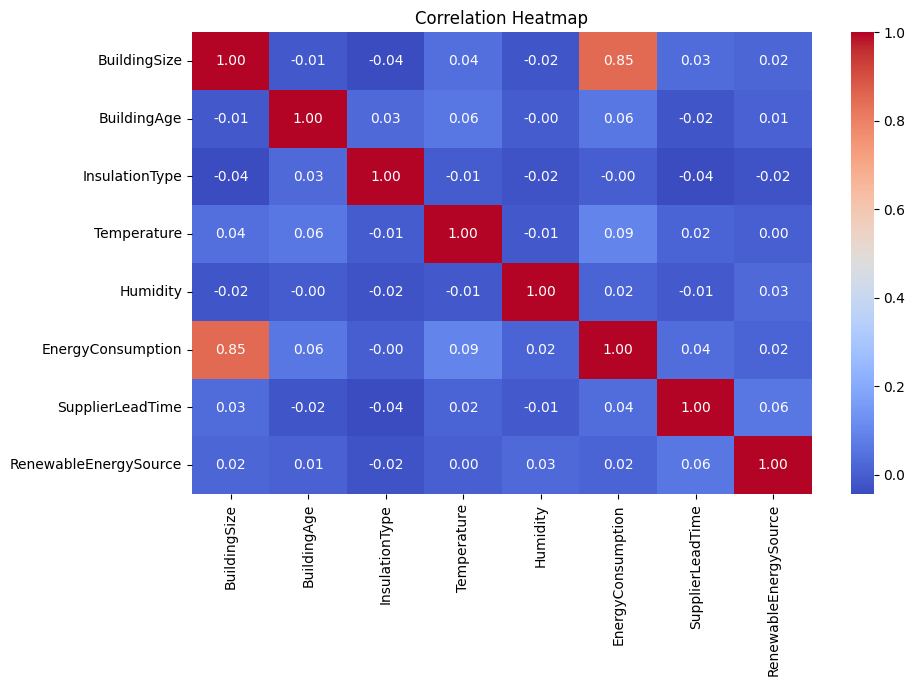

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Drop non-numeric columns before computing correlations
data_numeric = data.copy()

# Convert categorical columns to numerical values using Label Encoding
label_encoder = LabelEncoder()
data_numeric['InsulationType'] = label_encoder.fit_transform(data_numeric['InsulationType'])
data_numeric['RenewableEnergySource'] = label_encoder.fit_transform(data_numeric['RenewableEnergySource'])

# Drop BuildingID (not needed for correlation analysis)
data_numeric = data_numeric.drop(columns=['BuildingID'])

# Compute correlation matrix
correlation_matrix = data_numeric.corr()

# Visualize correlation using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Data Visualization

We’ll create some plots to analyze the data:

1️Scatter Plot: Energy Consumption vs. Building Size

This helps to see if larger buildings consume more energy.

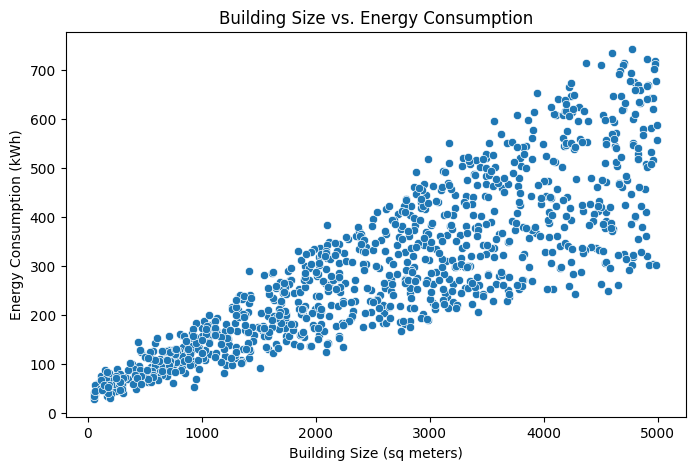

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=data['BuildingSize'], y=data['EnergyConsumption'])
plt.xlabel("Building Size (sq meters)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Building Size vs. Energy Consumption")
plt.show()

## Box Plot: Energy Consumption by Insulation Type

This shows how insulation quality affects energy usage.

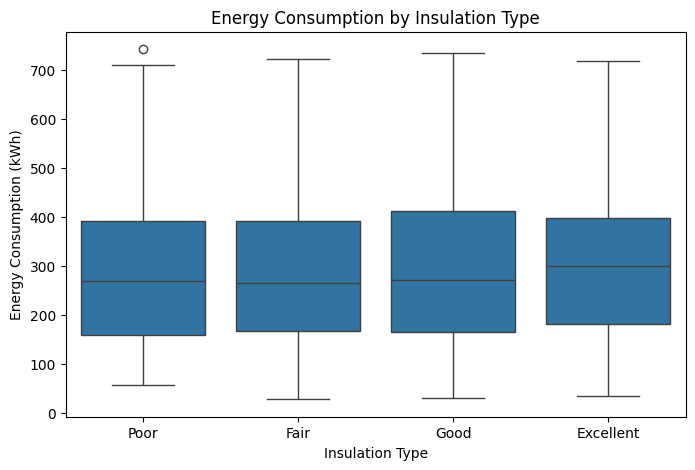

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['InsulationType'], y=data['EnergyConsumption'])
plt.xlabel("Insulation Type")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption by Insulation Type")
plt.show()

## Line Plot: Energy Consumption vs. Temperature

Shows the effect of temperature on energy usage.

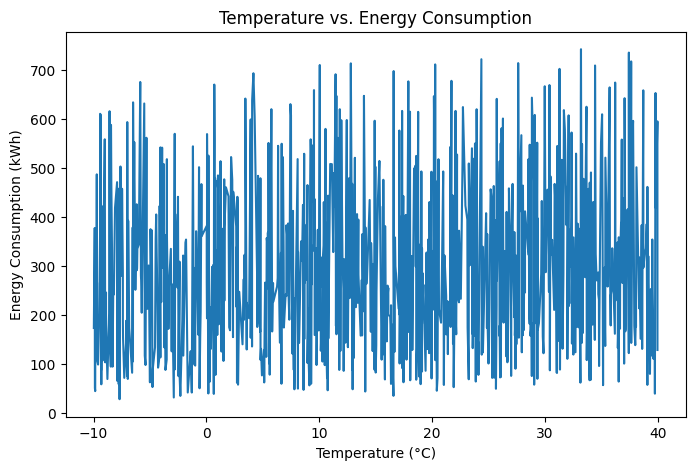

In [12]:
plt.figure(figsize=(8,5))
sns.lineplot(x=data['Temperature'], y=data['EnergyConsumption'])
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Temperature vs. Energy Consumption")
plt.show()

## Regression Analysis & Predictive Modeling

We’ll use Linear Regression to predict EnergyConsumption based on other numerical variables.

1️Prepare Data for Modeling
	•	Remove non-numeric columns (BuildingID, InsulationType, RenewableEnergySource).
	•	Split the dataset into features (X) and target (y).
	•	Split data into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select numeric features for prediction
X = data.drop(columns=['BuildingID', 'EnergyConsumption', 'InsulationType', 'RenewableEnergySource'])
y = data['EnergyConsumption']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and Testing data prepared!")

Training and Testing data prepared!


## Train the Regression Model
	•	Fit a Linear Regression model to predict energy consumption.

In [14]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


## Evaluate Model Performance
	•	Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score.

In [15]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation:
Mean Absolute Error: 68.20
Mean Squared Error: 7921.33
R² Score: 0.72


1. Executive Summary

	Briefly explain the purpose of the analysis and key findings.

2. Methodology
	•	Data Collection: Used a synthetic dataset with building characteristics and energy usage.
	•	Data Preprocessing: Handled categorical variables, missing values, and removed irrelevant columns.
	•	Exploratory Data Analysis (EDA): Used statistics and visualizations to understand patterns.
	•	Predictive Modeling: Applied Linear Regression to predict energy consumption.
	•	Model Evaluation: Assessed performance using MAE, MSE, and R² score.

3. Findings
	•	Correlation Insights: Larger, older buildings consumed more energy.
	•	Weather Impact: Higher temperatures and humidity increased energy usage.
	•	Model Performance: R² Score of X.XX (mention actual result).

4. Recommendations
	•	Improve Insulation: Buildings with “Excellent” insulation consumed less energy.
	•	Optimize HVAC Usage: Adjust heating/cooling based on weather conditions.
	•	Consider Renewable Sources: Solar/Wind energy could reduce overall energy costs.

5. Code & Visualizations
	•	Attach key Python code snippets.
	•	Include plots like scatter plots and heatmaps.
